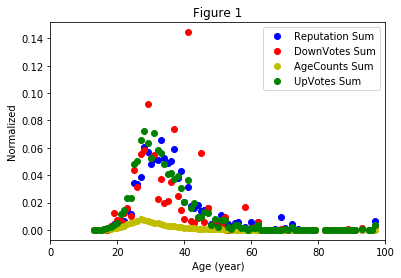

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df = pd.read_pickle('TDI_2017_stackoverflow_users_df.pkl')


CreationYear = df.CreationDate.apply(lambda x: x[:4])
df['CreationYear'] = CreationYear
LastAccessYear = df.LastAccessDate.apply(lambda x: x[:4])
df['LastAccessYear'] = LastAccessYear

AgeCounts=df.Age.value_counts().to_dict()

df.UpVotes = pd.to_numeric(df.UpVotes)
df.DownVotes = pd.to_numeric(df.DownVotes)
df.Reputation = pd.to_numeric(df.Reputation)

UpVotesSum = df.groupby(['Age']).UpVotes.sum().to_dict()
DownVotesSum = df.groupby(['Age']).DownVotes.sum().to_dict()
DictAge = df.Age.to_dict()
DictUpVotes = df.UpVotes.to_dict()
DictDownVotes = df.DownVotes.to_dict()
ReputationSum = df.groupby(['Age']).Reputation.sum().to_dict()

def norm(list):
    x = np.array(list)/float(np.max(list))
    return x

plt.plot(ReputationSum.keys(), norm(ReputationSum.values()),'bo', label = 'Reputation Sum')
plt.plot(DownVotesSum.keys(), norm(DownVotesSum.values()),'ro', label = 'DownVotes Sum')
plt.plot(AgeCounts.keys(),norm(AgeCounts.values()),'yo', label = 'AgeCounts Sum')
plt.plot(UpVotesSum.keys(), norm(UpVotesSum.values()),'go', label = 'UpVotes Sum')

plt.legend()

plt.xlim(0,100)
plt.ylabel('Normalized')
plt.xlabel('Age (year)')
plt.title('Figure 1')
plt.show()

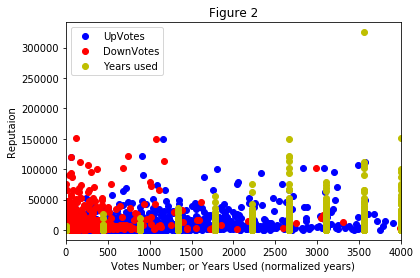

In [2]:
def norm_useyr(list):
    x = np.array(list)/float(np.max(list))*4000
    return x

UpVotes = df.UpVotes.to_dict()

# calculate years used
df['a'] = pd.to_numeric(df.LastAccessYear)
df['b'] = pd.to_numeric(df.CreationYear)
x=df.a - df.b
xx=x.to_dict()

DownVotes = df.DownVotes.to_dict()
Reputation = df.Reputation.to_dict()
CreationYear = df.CreationYear.to_dict()

plt.plot(UpVotes.values(), Reputation.values(), 'bo', label ='UpVotes')
plt.plot(DownVotes.values(),Reputation.values(),  'ro', label ='DownVotes')

plt.plot(norm_useyr(xx.values()), Reputation.values(), 'yo', label ='Years used')
plt.xlim(0,4000)
plt.legend()
plt.xlabel('Votes Number; or Years Used (normalized years)')
plt.ylabel('Reputaion')
plt.title('Figure 2')
plt.show()